In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchC


In [61]:
white=pd.read_csv("winequality-white.csv",delimiter=";")
red=pd.read_csv("winequality-red.csv",delimiter=";")

In [60]:
print(white.head(5))
print(red.head(5))
red.describe()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


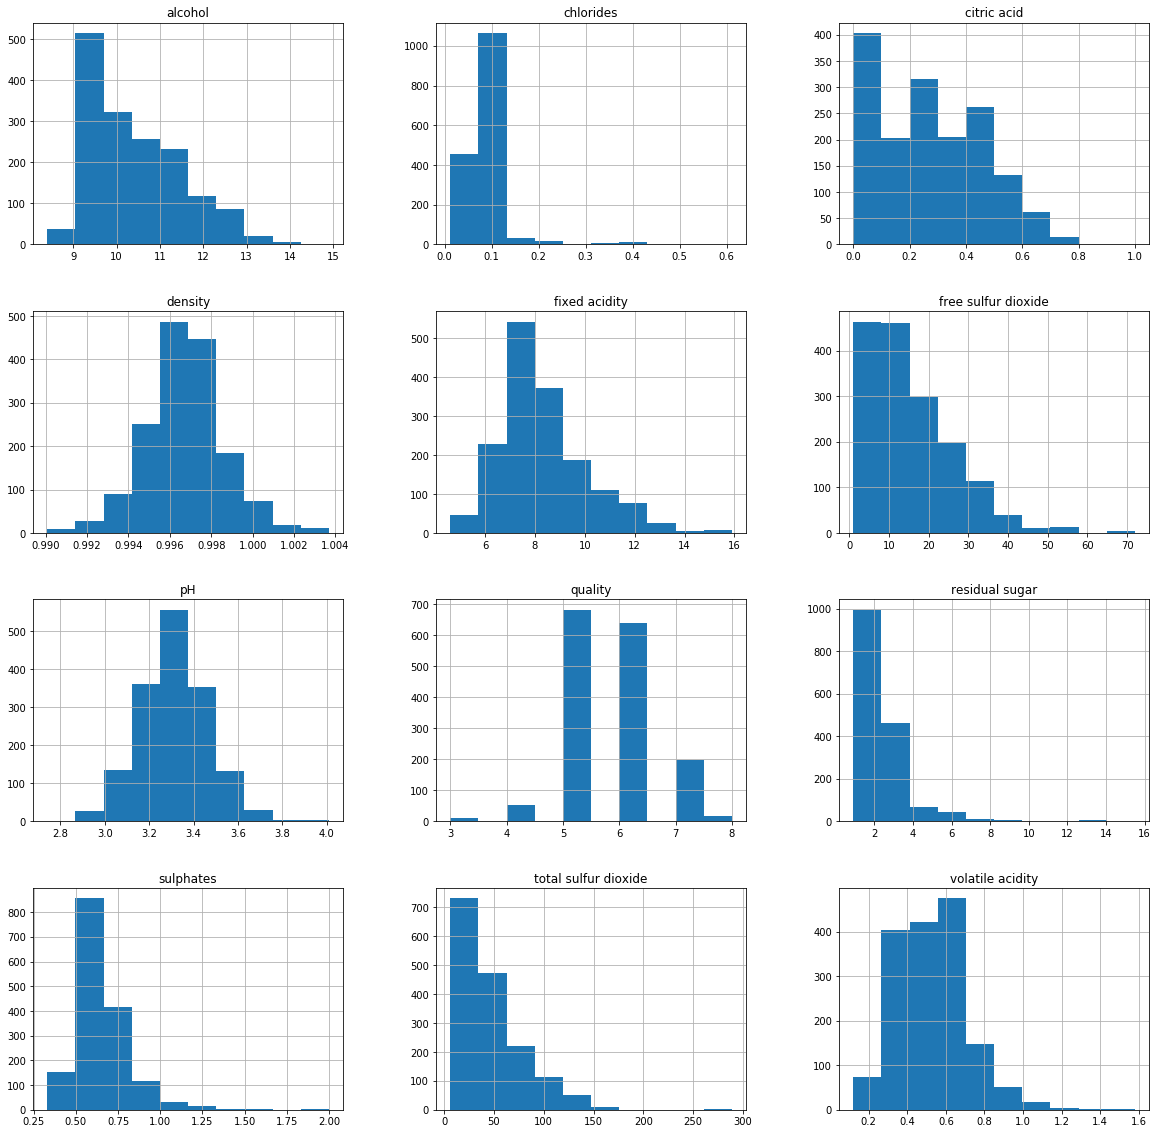

In [62]:
import seaborn as sns
%matplotlib inline

red.hist(bins=10, figsize=(20,20))
plt.show()

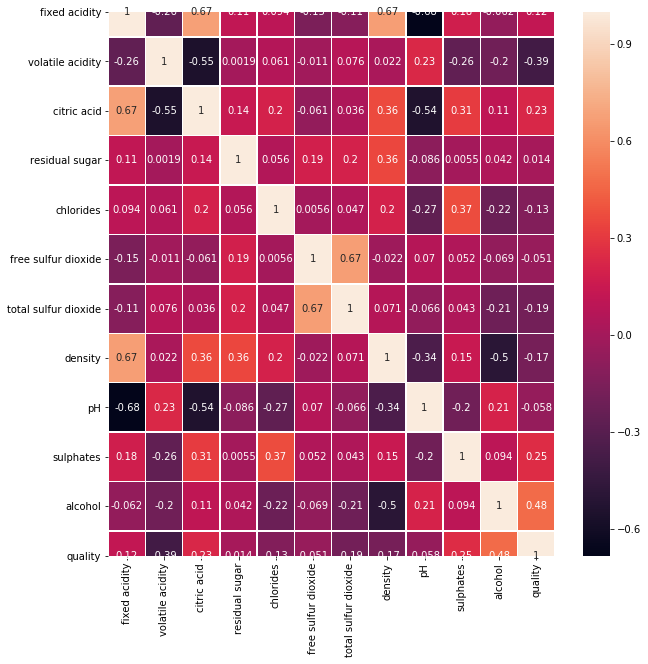

In [64]:
corelation = red.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corelation,annot=True,linewidths=.5,ax=ax)
plt.show()

In [67]:
corelation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [68]:
data=red.copy()
red.drop(['free sulfur dioxide', 'residual sugar', 'pH', 
          'chlorides', 'fixed acidity'],
         axis=1, inplace=True)
red.head()



,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,34.0,0.9978,0.56,9.4,5


In [72]:
Y=red['quality']
X=red.drop("quality",axis=1)


print(X.head())

   volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
0              0.70         0.00                  34.0   0.9978       0.56   
1              0.88         0.00                  67.0   0.9968       0.68   
2              0.76         0.04                  54.0   0.9970       0.65   
3              0.28         0.56                  60.0   0.9980       0.58   
4              0.70         0.00                  34.0   0.9978       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [81]:
sc = StandardScaler()
X=sc.fit_transform(X)

data=pd.DataFrame(X,columns=red.drop('quality',axis=1).columns)
data['quality']=red['quality']

data.head()


,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,5
1,1.967442,-1.391472,0.624363,0.028261,0.128950,-0.584777,5
2,1.297065,-1.186070,0.229047,0.134264,-0.048089,-0.584777,5
3,-1.384443,1.484154,0.411500,0.664277,-0.461180,-0.584777,6
4,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,5


In [83]:
bins=(2,6.5,8)
groups=['bad','good']
data['quality']=pd.cut(data['quality'],bins=bins,labels=groups)



In [85]:
lb=LabelEncoder()
data['quality']=lb.fit_transform(data['quality'])
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [86]:
data.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,0
1,1.967442,-1.391472,0.624363,0.028261,0.128950,-0.584777,0
2,1.297065,-1.186070,0.229047,0.134264,-0.048089,-0.584777,0
3,-1.384443,1.484154,0.411500,0.664277,-0.461180,-0.584777,0
4,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,0


In [87]:
# Test Train SPLit
X=data.drop('quality',axis=1)
y=data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [91]:
lg= LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.48      0.40      0.44        30

    accuracy                           0.90       320
   macro avg       0.71      0.68      0.69       320
weighted avg       0.90      0.90      0.90       320



 With Grid Search

In [101]:
parameters={
    'tol' :[1e-4,1e-3],
    'C':[0.5,1,2],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

In [102]:
from sklearn.model_selection import GridSearchCV
grid_lg=GridSearchCV(lg, parameters,scoring='accuracy')
grid_lg.fit(X_train,y_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.5, 1, 2],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [103]:
grid_lg.best_params_

{'C': 0.5, 'solver': 'newton-cg', 'tol': 0.0001}

In [104]:
grid_lg.best_score_


0.8655199374511336

In [106]:
grid_y_pred=grid_lg.predict(X_test)
print(classification_report(y_test,grid_y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.48      0.40      0.44        30

    accuracy                           0.90       320
   macro avg       0.71      0.68      0.69       320
weighted avg       0.90      0.90      0.90       320



In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_classifier.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [111]:
y_pred_rf = rf_classifier.predict(X_test)

print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       290
           1       0.59      0.63      0.61        30

    accuracy                           0.93       320
   macro avg       0.78      0.79      0.79       320
weighted avg       0.93      0.93      0.93       320



In [112]:
# GradientBOOStingClAssifier
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)
gradient_pred = gradient.predict(X_test)
print(classification_report(y_test, gradient_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       290
           1       0.48      0.50      0.49        30

    accuracy                           0.90       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.90      0.90      0.90       320



In [113]:
parameters_gradient = {
    'learning_rate':[0.05,0.1,0.2],
    'n_estimators':[50,100,200,500],
    'max_depth':[1,3,5]
}
grid_gradient = GridSearchCV(gradient, parameters_gradient, scoring='accuracy')
grid_gradient.fit(X_train, y_train)


C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [114]:
grid_gradient.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

In [115]:
grid_lg.best_score_

0.8655199374511336

In [116]:
gradient_grid_pred = grid_gradient.predict(X_test)
print(classification_report(y_test, gradient_grid_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       290
           1       0.57      0.67      0.62        30

    accuracy                           0.92       320
   macro avg       0.77      0.81      0.79       320
weighted avg       0.93      0.92      0.92       320



In [121]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

cross_score=cross_val_score(grid_gradient.best_estimator_,X_train,
                            y_train,scoring='accuracy',n_jobs=-1,cv=10)



In [122]:
print(cross_score)

[0.88372093 0.88372093 0.8515625  0.8828125  0.8984375  0.8984375
 0.90625    0.91338583 0.91338583 0.90551181]


In [123]:
print(cross_score.mean())

0.8937225325032045
